In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#B_z = constant
h_cut = 1
m_e = 1
e_charge = 1
g_e = 2.002319
bohr_magneton = e_charge*h_cut/(2*m_e)
gyro_con = (g_e/h_cut)*bohr_magneton
#omega = g_e*bohr_magneton*B_z/h_cut

In [3]:
def spin_function(spin_state):
    if spin_state == "spin_up":
        mat = np.array([[1], [0]])
        return mat
    elif spin_state == "spin_down":
        mat = np.array([[0],[1]])
        return mat
    elif spin_state == "spin_right":   # +x
        mat = np.array([[1],[1]])
        return mat
    elif spin_state == "spin_left":    # -x
        mat = np.array([[1], [-1]])
        return mat
    elif spin_state == "spin_out":   # +y
        mat = np.array([[1],[1j]])
        return mat
    elif spin_state == "spin_in":    # -y
        mat = np.array([[1], [-1j]])
        return mat

In [4]:
def inner_product(left_vec, right_vec):
    bra = (np.conj(left_vec)).T
    ket = right_vec
    inner_prod = bra @ ket
    return inner_prod

In [5]:
def norm_column_vec(x):
    # m, n = x.shape
    inner_pro = inner_product(x, x)
    # inner_prodcut is still a 1x1 array, lets extract the element and take its sqrt
    norm = np.sqrt(np.squeeze(inner_pro))
    x_norm = x / norm
    return x_norm

In [6]:
# H = K + V
# K = 0 ; particle at rest; 
# H = V
# V = zeeman interaction
# V = (g_e*bohr_magneton/h_cut)*B*S
# V = gyro_con*B*S
# We choose a coordinat system so that B is pointing in the z dir;
# B.S = Bz.Sz
# Sz = pauli matrix in z direction measurement
# also, omega = B*gyro_con
# therefore the time_period of precession -> T = 2*pi/omega
# V = omega*S

In [7]:
def tdse(ini_spin_state, t, omega):
    spin_mat = spin_function(ini_spin_state)
    a_0 = np.squeeze(spin_mat[0])
    b_0 = np.squeeze(spin_mat[1])

    a = a_0*np.exp(-1.0j*omega*t/2)
    b = b_0*np.exp(1.0j*omega*t/2)
    eigen_vec_t = np.array([[a], [b]])
    eigen_vec_t = norm_column_vec(eigen_vec_t)

    return eigen_vec_t

In [8]:
def probability(ini_spin_state, t, omega, measurement_state):
    eigen_vec_t = tdse(ini_spin_state, t, omega)
    measurement_state = spin_function(measurement_state)
    measurement_state = norm_column_vec(measurement_state)
    probability = np.squeeze(np.square(inner_product(measurement_state, eigen_vec_t)))
    
    return abs(probability)

In [9]:
B_z = 3
h_cut = 1
m_e = 1
e_charge = 1
g_e = 2.002319
bohr_magneton = e_charge*h_cut/(2*m_e)
gyro_con = (g_e/h_cut)*bohr_magneton
omega = g_e*bohr_magneton*B_z/h_cut

In [26]:
# Time period is of: 2*pi/omega
time = np.arange(0,1.1, 0.01)
ini_spin_state = "spin_in"
measurement_state = "spin_out"
prob = []
for i in time:
    t = i* 2*np.pi/omega
    prob.append(probability(ini_spin_state, t, omega, measurement_state))

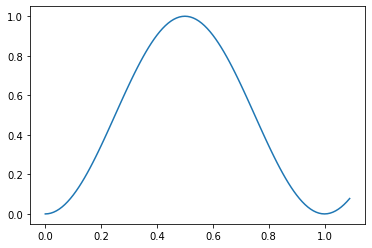

In [27]:
plt.plot(time, prob)